# Dimensionality Reduction Using PCA and LDA

# Concept Session


## Demo - 5.1: Dimensionality Reduction - Customer Segmentation

### Mounting Google Drive

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns


### Loading Data

In [5]:
df = pd.read_csv('/content/DS2_C6_S5_MallCustomers_Data_Concept.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing Data

In [6]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)',]].copy()
X.columns = ['Age','Income', 'Score']
X['Gender'] = df['Gender'] == 'Male'
X.astype(float).head()

,Age,Income,Score,Gender
0,19.0,15.0,39.0,1.0
1,21.0,15.0,81.0,1.0
2,20.0,16.0,6.0,0.0
3,23.0,16.0,77.0,0.0
4,31.0,17.0,40.0,0.0


In [7]:
X1 = X.pop('Income') # remove column Income and store it in X1
X['Income']=X1 # add Income series as a 'new' column.
X.head()

,Age,Score,Gender,Income
0,19,39,True,15
1,21,81,True,15
2,20,6,False,16
3,23,77,False,16
4,31,40,False,17


### Visualizing Data

Text(0, 0.5, 'Annual Income (k$)')

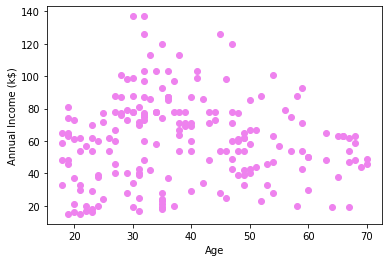

In [8]:
# 2-D Plot
plt.scatter(X['Age'], X['Income'],c='violet')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

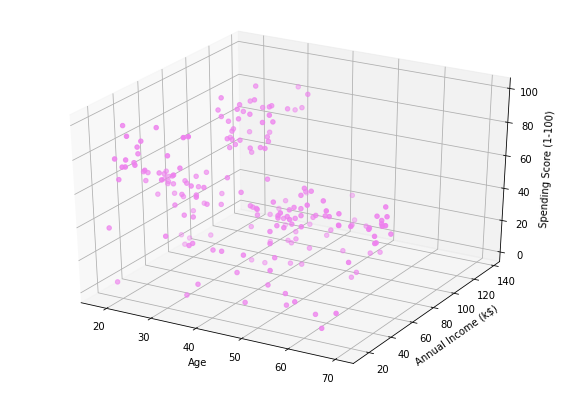

In [9]:
# 3-D Plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X['Age'], X['Income'], X['Score'], color = "violet")
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
# show plot
plt.show()

### Building Model

#### Using K-Means Clustering Algorithm

In [10]:
cols = ['Age', 'Score', 'Gender','Income']
def make_kmeans(attributes=cols, scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=3, show='features'):
  attributes = list(attributes)
  scaled_values = scaler.fit_transform(X[attributes])
  X_l=X.iloc[:, 0:3].values
  y_l=X.iloc[:, 3].values
  components = min(components, len(attributes))
  if dimension_reduction == 'pca':
    values = PCA().fit_transform(scaled_values)[:, :components]
  elif dimension_reduction == 'lda':
    values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
  else:
    values = scaled_values
  cluster = KMeans(n_clusters=k).fit_predict(values)
  if show == 'features':
    df_plot = X.astype(float).copy()
  elif show == 'values':
    df_plot = pd.DataFrame(values)
  
  df_plot['cluster'] = cluster
  sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])
  
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans, attributes=widgets.SelectMultiple(options=cols, 
              value=cols, rows=len(cols),description='Features', layout=layout, 
              style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True), 
              scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), 
              ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
              ,description='Scaler', layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
              , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)]
              ,description='Dimensionality Reduction'
              , layout=layout, style=style,disabled=False,continuous_update=False,orientation=
              'horizontal',readout=True)
              , components=widgets.SelectionSlider(options=range(1, 5), value=4
              ,description='PCA components', layout=layout, style=style
              ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
              , k=widgets.SelectionSlider(options=range(2, 8),description='k'
              , layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
              , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
              ,description='Show'
              , layout=layout, style=style
              ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
)

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3), layout=Layout(width='400px'),…

**Exercise:**
- Can we achieve better result with PCA?
- What happens if we remove features from the clustering?
- What is the best value for `k`?
- How would you name the identified clusters?

Answers:

1. Yes. PCA extracts the features from the data,principal componenst which carries maximum variance. 

2.It may lead to loss of some information resulting in poor clusters

3.The optimal value of 'k' can be found using elbow method

4. The clusters can be named as spending score_Male Vs Spending score_Female

#### Using DBSCAN Clustering Algorithm

In [14]:
cols = ['Age', 'Score', 'Gender','Income']
def make_dbscan(attributes=cols, scaler=MinMaxScaler(), dimension_reduction=None, components=2, eps=.5,min_samples=5, show='features'):
  attributes = list(attributes)
  scaled_values = scaler.fit_transform(X[attributes])
  X_l=X.iloc[:, 0:3].values
  y_l=X.iloc[:, 3].values
  components = min(components, len(attributes))
  if dimension_reduction == 'pca':
    values = PCA().fit_transform(scaled_values)[:, :components]
  elif dimension_reduction == 'tsne':
    values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
  else:
    values = scaled_values
  cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
  print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
  if show == 'features':
    df_plot = X.astype(float).copy()
  elif show == 'values':
    df_plot = pd.DataFrame(values)
  df_plot['cluster'] = cluster
  sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_dbscan
  , attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
  ,description='Features', layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
  ,description='Scaler', layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)]
  ,description='Dimensionality Reduction'
  , layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , components=widgets.SelectionSlider(options=range(1, 5), value=4
  ,description='Number components'
  , layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5
  ,description='Epsilon'
  , layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , min_samples=widgets.SelectionSlider(options=range(1, 20), value=5
  ,description='Min. samples'
  , layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
  ,description='Show'
  , layout=layout, style=style
  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
  )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3), layout=Layout(width='400px'),…

**Exercise:**
- Do the clusters found by DBSCAN differ from the clusters found by k-means?
- How do the parameters `epsilon` and `min_samples` influence the clusters? What are good values?

Answers:

1.No. The clusters are the same. It shows the 2-D plot of each pair of features in the dataset

2.Lower values of epsilon gives more number of small clusters and larger values tend to push all the data into the same cluster.
An optimal value could be found using K-distance graph

min points- larger values are usually better for data sets with noise and will yield more significant clusters. it can start from 3
